In [1]:
#This is just to gets my hands dirty by doing what's learnt so far
#1. Data load
#2. Data describe
#3. Data clean up - do null check and replace values
#4. Train the model
#5. Test the model
#6. Predict with someother data
#7. Plot
#8. Regression
#9. Metrics
#10. residual

In [19]:
import pandas as p
df = p.read_csv("..\\datasets\\student-por.csv");
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [12]:
#Clean up

In [15]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [20]:
# Fill numeric columns with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [24]:
# Example: pick 2 numeric features and target
X = df[['studytime', 'failures', 'age','traveltime']]  # hours of study, number of past failures
y = df['G3']  # final grade


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred = model.predict(X_test)

# Predict for some custom input
custom_pred = model.predict([[2, 1, 23, 10]])  # 2 studytime, 1 past failure
print("Predicted Grade:", custom_pred[0])

custom_pred = model.predict([[2, 1, 23, 2]])  # 2 studytime, 1 past failure
print("Predicted Grade:", custom_pred[0])


Predicted Grade: 6.670819173074708
Predicted Grade: 10.116363399319132


C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.74325437 -1.98732989 -0.00460028 -0.43069303]
Intercept: 11.58437693219688


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)



MAE: 2.2086272030773215
MSE: 8.406011646844593
RMSE: 2.8993122713575703
R²: 0.13799666979154857


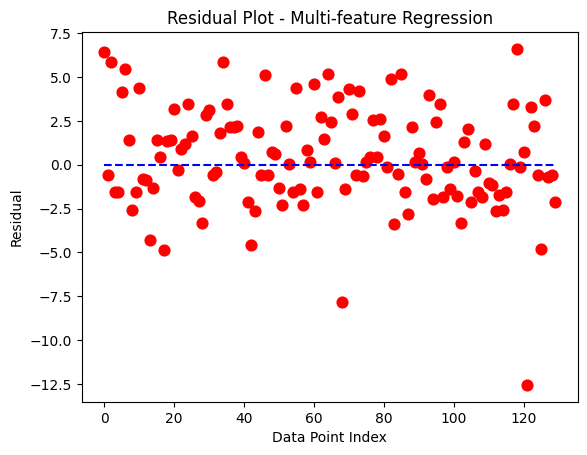

In [31]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(range(len(y_test)), residuals, color='red', s=60)
plt.hlines(y=0, xmin=0, xmax=len(y_test)-1, colors='blue', linestyles='dashed')
plt.xlabel('Data Point Index')
plt.ylabel('Residual')
plt.title('Residual Plot - Multi-feature Regression')
plt.show()


In [32]:
#Earlier i had 4 features (studytime,pastfailure,age,travelTime)

In [33]:
#Now, I will add another feature, to see how it would impact the plot 
#freetime

In [48]:
# Example: pick 2 numeric features and target
X = df[['studytime', 'failures', 'age','traveltime', 'freetime','Walc']]  # hours of study, number of past failures
y = df['G3']  # final grade


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(X_test)

# Predict for some custom input
custom_pred = model.predict([[2, 1, 23, 10, 1,5]])  # 2 studytime, 1 past failure
print("Predicted Grade:", custom_pred[0])

custom_pred = model.predict([[4, 1, 23, 2, 1,10]])  # 2 studytime, 1 past failure
print("Predicted Grade:", custom_pred[0])

Predicted Grade: 6.464220106073981
Predicted Grade: 9.868043627186685


C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


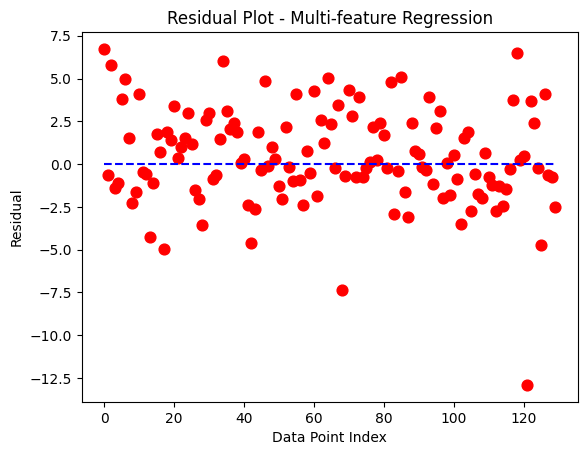

In [51]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(range(len(y_test)), residuals, color='red', s=60)
plt.hlines(y=0, xmin=0, xmax=len(y_test)-1, colors='blue', linestyles='dashed')
plt.xlabel('Data Point Index')
plt.ylabel('Residual')
plt.title('Residual Plot - Multi-feature Regression')
plt.show()

In [40]:
#As adding another feature did not help

In [41]:
#Here, i m checking the coefficients for each columns, so we know what could be used better

In [52]:
import pandas as pd
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)



      Feature  Coefficient
0   studytime     0.644972
1    failures    -1.942620
2         age     0.015969
3  traveltime    -0.423144
4    freetime    -0.121280
5        Walc    -0.254254


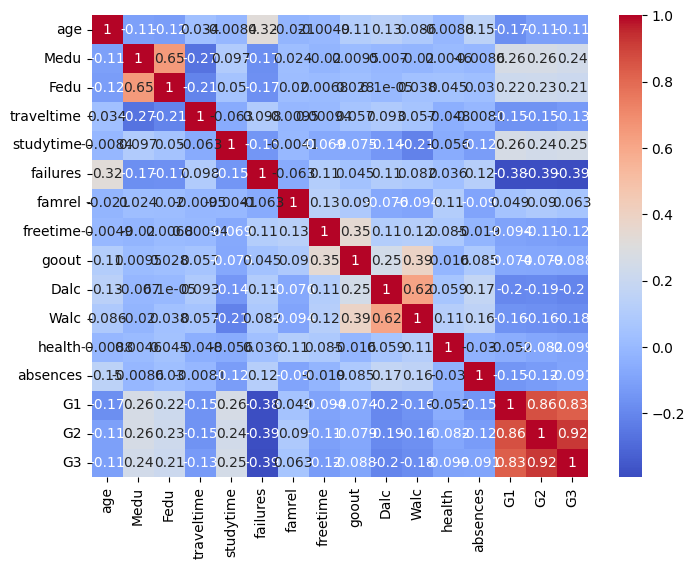

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [53]:
#what if scenario
#(studytime, failures, age, traveltime, freetime, Walc)

In [55]:
custom_pred =model.predict([[2, 1, 17, 5, 3, 2]])
print("Predicted Grade:", custom_pred[0])

Predicted Grade: 9.004327155975782


C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
#Scenario 2 – Hardworking student, no failures

In [57]:
custom_pred=model.predict([[4, 0, 17, 3, 2, 1]])
print("Predicted Grade:", custom_pred[0])

Predicted Grade: 13.458713504765537


C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
#Scenario 3 – Struggling student, long commute

In [59]:
custom_pred=model.predict([[1, 3, 17, 10, 5, 4]])
print("Predicted Grade:", custom_pred[0])

Predicted Grade: 1.6073268565829313


C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
#Scenario 4 – Balanced student, high freetime

In [61]:
custom_pred = model.predict([[3, 1, 18, 4, 6, 2]])
print("Predicted Grade:", custom_pred[0])

Predicted Grade: 9.724573122687737


C:\Users\karth\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [62]:
import pandas as pd

# 4 scenarios
scenarios = pd.DataFrame([
    [2, 1, 17, 5, 3, 2],   # Average student
    [4, 0, 17, 3, 2, 1],   # Hardworking student
    [1, 3, 17, 10, 5, 4],  # Struggling student
    [3, 1, 18, 4, 6, 2]    # Balanced student
],
columns=['studytime', 'failures', 'age', 'traveltime', 'freetime', 'Walc'])

# Predict grades for all scenarios
scenarios['Predicted_Grade'] = model.predict(scenarios)

# Add readable labels
scenarios.index = [
    'Average student',
    'Hardworking student',
    'Struggling student',
    'Balanced student'
]

scenarios


,studytime,failures,age,traveltime,freetime,Walc,Predicted_Grade
Average student,2,1,17,5,3,2,9.004327
Hardworking student,4,0,17,3,2,1,13.458714
Struggling student,1,3,17,10,5,4,1.607327
Balanced student,3,1,18,4,6,2,9.724573
